![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png) + ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)
## Machine Learning con Apache Spark y Python
### Generar un flujo de ejecución en un problema de Machine Learning

Esta tarea simula un ejercicio completo de ETL (Extract-Transform-Load) junto a un análisis exploratorio de un dataset real, para posteriormente aplicar differentes algoritmos de aprendizaje automático que resuelvan un problema de regresión.

#### Contenido del ejercicio

* *Conocimiento del dominio*
* *Parte 1: Extracción, transformación y carga [ETL] del dataset* 
* *Parte 2: Explorar los datos* 
* *Parte 3: Visualizar los datos* 
* *Parte 4: Preparar los datos* 
* *Parte 5: Modelar los datos* 

*Nuestro objetivo será predecir de la forma más exacta posible la energía generada por un conjunto de plantas eléctricas usando los datos generados por un conjunto de sensores.*


## Conocimiento del dominio

### Background 

La generación de energía es un proceso complejo, comprenderlo para poder predecir la potencia de salida es un elemento vital en la gestión de una planta energética y su conexión a la red. Los operadores de una red eléctrica regional crean predicciones de la demanda de energía en base a la información histórica y los factores ambientales (por ejemplo, la temperatura). Luego comparan las predicciones con los recursos disponibles (por ejemplo, plantas, carbón, gas natural, nuclear, solar, eólica, hidráulica, etc). Las tecnologías de generación de energía, como la solar o la eólica, dependen en gran medida de las condiciones ambientales, pero todas las centrales eléctricas son objeto de mantenimientos tanto planificados como puntuales debidos a un problema.

En esta tarea usaremos un ejemplo del mundo real sobre la demanda prevista (en dos escalas de tiempo), la demanda real, y los recursos disponibles de la red electrica de California: http://www.caiso.com/Pages/TodaysOutlook.aspx

![](http://content.caiso.com/outlook/SP/ems_small.gif)

El reto para un operador de red de energía es cómo manejar un déficit de recursos disponibles frente a la demanda real. Hay tres posibles soluciones a un déficit de energía: construir más plantas de energía base (este proceso puede costar muchos años de planificación y construcción), comprar e importar de otras redes eléctricas regionales energía sobrante (esta opción puede ser muy cara y está limitado por las interconexiones entre las redes de transmisión de energía y el exceso de potencia disponible de otras redes), o activar pequeñas [plantas de pico](https://en.wikipedia.org/wiki/Peaking_power_plant). Debido a que los operadores de red necesitan responder con rapidez a un déficit de energía para evitar un corte del suministro, estos basan sus decisiones en una combinación de las dos últimas opciones. En esta práctica, nos centraremos en la última elección.

### La lógica de negocio

Debido a que la demanda de energía solo supera a la oferta ocasionalmente, la potencia suministrada por una planta de energía pico tiene un precio mucho más alto por kilovatio hora que la energía generada por las centrales eléctricas base de una red eléctrica. Una planta pico puede operar muchas horas al día, o solo unas pocas horas al año, dependiendo de la condición de la red eléctrica de la región. Debido al alto coste de la construcción de una planta de energía eficiente, si una planta pico solo va a funciónar por un tiempo corto o muy variable, no tiene sentido económico para que sea tan eficiente como una planta de energía base. Además, el equipo y los combustibles utilizados en las plantas base a menudo no son adecuados para uso en plantas de pico.

La salida de potencia de una central eléctrica pico varía dependiendo de las condiciones ambientales, por lo que el problema de negocio a resolver se podría describir como _predecir la salida de potencia de una central eléctrica pico en función de la condiciones ambientales_  - ya que esto permitiría al operador de la red hacer compensaciones económicas sobre el número de plantas pico que ha de conectar en cada momento (o si por el contrario le interesa comprar energía más cara de otra red).

Una vez descrita esta lógica de negocio, primero debemos proceder a realizar un análisis exploratorio previo y trasladar el problema de negocio (predecir la potencia de salida en función de las condiciones medio ambientales) en un tarea de aprendizaje automático (ML). Por ejemplo, una tarea de ML que podríamos aplicar a este problema es la regresión, ya que tenemos un variable objetivo (dependiente) que es numérica. Para esto usaremos [Apache Spark ML Pipeline](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark-ml-package) para calcular dicha regresión.

Los datos del mundo real que usaremos en esta tarea se componen de 5 conjuntos de 9.568 puntos de datos, cada uno con 4 atributos ambientales recogidos en una Central de Ciclo Combinado de más de 6 años (2006-2011), proporcionado por la Universidad de California, Irvine en [UCI Machine Learning Repository Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)). Para más detalles sobre el conjunto de datos visitar la página de la UCI, o las siguientes referencias:

* Pinar Tufekci, [Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods](http://www.journals.elsevier.com/international-journal-of-electrical-power-and-energy-systems/), International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.
* Heysem Kaya, Pinar Tufekci and Fikret S. Gurgen: [Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine](http://www.cmpe.boun.edu.tr/~kaya/kaya2012gasturbine.pdf), Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai).

**Tarea a realizar durante la primera parte:**

Revisar la documentacion y referencias de:
* [Spark Machine Learning Pipeline](https://spark.apache.org/docs/latest/ml-guide.html#main-concepts-in-pipelines).


## Parte 1: Extracción, transformación y carga [ETL] del dataset


Ahora que entendemos lo que estamos tratando de hacer, el primer paso consiste en cargar los datos en un formato que podemos consultar y utilizar fácilmente. Esto se conoce como ETL o "extracción, transformación y carga". 

==========================================================================================================================================================================================================
### Ejercicio 1(a)

Usaremos PySpark para visualizar las 5 primeras líneas de los datos

*Hint*: Primero crea un RDD a partir de los datos usando [`sc.textFile()`](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.textFile).

*Hint*: Luego piensa como usar el RDD creado para mostrar datos, el método [`take()`](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.take) puede ser una buena opción a considerar.

In [1]:
# TODO: Load the data and print the first five lines.
import findspark
findspark.init()
import pyspark
import random
import os.path
sc = pyspark.SparkContext(master="local[1]",appName='M5TO1_miquel_salas')

''' 
Crearem una variable fileName amb la ruta de l'arxiu csv i després fem un RDD
fent servir 'sc.textFile()' amb la variable fileName. per veure 
les 5 primeres files, fem servir data.take(5).
'''
fileName = os.path.join('C:/Users/Joan Salas Dalmau/Downloads', 'Dades_Folds5x2_pp.csv')
data = sc.textFile(fileName) 
data.take(5)

['AT;V;AP;RH;PE',
 '14.96;41.76;1024.07;73.17;463.26',
 '25.18;62.96;1020.04;59.08;444.37',
 '5.11;39.4;1012.16;92.14;488.56',
 '20.86;57.32;1010.24;76.64;446.48']

A partir nuestra exploración inicial de una muestra de los datos, podemos hacer varias observaciones sobre el proceso de ETL:
- Los datos son un conjunto de .csv (archivos con valores separados por coma o punto y coma) 
- Hay una fila de cabecera, que es el nombre de las columnas
- Parece que el tipo de los datos en cada columna es constante (es decir, cada columna es de tipo double)

El esquema de datos que hemos obtenido de UCI es:
- AT = Atmospheric Temperature in C
- V = Exhaust Vacuum Speed
- AP = Atmospheric Pressure
- RH = Relative Humidity
- PE = Power Output.  Esta es la variable dependiente que queremos predecir usando los otras cuatro

Para usar el paquete Spark CSV, usaremos el método [sqlContext.read.format()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.format) para especificar el formato de la fuente de datos de entrada: `'csv'`

Podemos especificar diferentes opciones de como importar los datos usando el método [options()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.options).

Usaremos las siguientes opciones:
- `delimiter=';'` porque nuestros datos se encuentran delimitados por punto y coma
- `header='true'` porque nuestro dataset tiene una fila que representa la cabecera de los datos
- `inferschema='true'` porque creemos que todos los datos son números reales, por lo tanto la librería puede inferir el tipo de cada columna de forma automática.

El último componente necesario para crear un DataFrame es determinar la ubicación de los datos usando el método [load()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.load).

Juntando todo, usaremos la siguiente operación:

`sqlContext.read.format().options().load()`

### Ejercicio 1(b)

Crear un DataFrame a partir de los datos.
- El formato es csv

En el campo opciones incluiremos 3, formadas por nombre de opción y valor, separadas por punto y coma.
- El separador es el tabulador
- El fichero contiene cabecera 'header'
- Para crear un dataframe necesitamos un esquema (schema). A partir de los datos Spark puede tratar de inferir el esquema, le diremos 'true'.

El directorio a cargar es el especificado anteriormente. Es importante indicarle a Spark que es una ubicación ya montada en el sistema dbfs, como se ha mostrado en el ejercicio 2a.

In [2]:
 
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
#To stop spark context sc.stop()
'''
afegim 'csv' a format al tractar-se d'un arxiu csv, a options escriurem les opcions delimiter,
header i inferschema indicades a l'enunciat i finalment, afegim la variable fileName amb la
ubicació de l'arxiu de dades.
'''
powerPlantDF = sqlContext.read.format('csv')\
                              .options(delimiter=';', header='true', inferschema='true')\
                              .load(fileName)
type(powerPlantDF)

C:\Users\Joan Salas Dalmau\anaconda3\lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


pyspark.sql.dataframe.DataFrame

In [3]:
# TEST
expected = set([(s, 'double') for s in ('AP', 'AT', 'PE', 'RH', 'V')])
assert expected==set(powerPlantDF.dtypes), "Incorrect schema for powerPlantDF"

Vamos a comprobar los tipos de las columnas usando el método [dtypes](https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.DataFrame.dtypes).

In [4]:
#escriurem powerPlantDF.dtypes tal com s'ha escrit a la cel.la superior
print(powerPlantDF.dtypes)

[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]


Tambien podemos examinar los datos usando el método `show()`.

In [5]:
powerPlantDF.show()

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



Ahora en lugar de usar [spark csv](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html) para inferir (inferSchema()) los tipos de las columnas, especificaremos el esquema como [DataType](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.DataType), el cual es una lista de [StructField](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.StructType).

La lista completa de tipos se encuentra en el modulo [pyspark.sql.types](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#module-pyspark.sql.types). Para nuestros datos, usaremos [DoubleType()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.DoubleType).

Por ejemplo, para especificar cual es el nombre de la columna usaremos: `StructField(`_name_`,` _type_`, True)`. (El tercer parámetro, `True`, significa que permitimos que la columna tenga valores null.)

### Ejercicio 1(c)

Crea un esquema a medida para el dataset.

In [6]:
# TO DO: Fill in the custom schema.
from pyspark.sql.types import *

# Custom Schema for Power Plant
'''
afegim 5 vegades StructField() amb els noms de cada columna del dataframe powerPlantDF seguit
de DoubleType() per especificar el tipus de dades de la columna i True per permetre valors nuls.
'''
customSchema =  StructType([
    StructField('AT', DoubleType(), True),
    StructField('V', DoubleType(), True),
    StructField('AP', DoubleType(), True),
    StructField('RH', DoubleType(), True),
    StructField('PE', DoubleType(), True)])


In [7]:
# TEST
assert set([f.name for f in customSchema.fields])==set(['AT', 'V', 'AP', 'RH', 'PE']), 'Incorrect column names in schema.'
assert set([f.dataType for f in customSchema.fields])==set([DoubleType(), DoubleType(), DoubleType(), DoubleType(), DoubleType()]), 'Incorrect column types in schema.'

### Exercicio 1(d)

Ahora, usaremos el esquema que acabamos de crear para leer los datos. Para realizar esta operación, modificaremos el paso anterior `sqlContext.read.format`. Podemos especificar el esquema haciendo:
- Añadir `schema = customSchema` al método load 
- Eliminado la opción `inferschema='true'` ya que ahora especificamos el esquema que han de seguir los datos

In [8]:
# TODO: Use the schema you created above to load the data again.
'''
posem el mateix codi que el sqlContext anterior però sense incloure inferschema a options i
afegint schema(customSchema).
'''

altPowerPlantDF = sqlContext.read.format('csv') \
                                 .options(delimiter=';', header='true') \
                                 .schema(customSchema) \
                                 .load(fileName)

In [9]:
# TEST
expected = set([(s, 'double') for s in ('AP', 'AT', 'PE', 'RH', 'V')])
assert expected==set(altPowerPlantDF.dtypes), "Incorrect schema for powerPlantDF"

Es importante darse cuenta que esta vez no se ha ejecutado ningún job de Spark. Esto se debe a que hemos especificado el esquema, por tanto el paquete [spark-csv](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html) no tiene por qué leer los datos para inferir el esquema. Podemos usar el método [dtypes](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.dtypes) para examinar el nombre y el tipo de los atributos del dataset. Estos deberían ser idénticos a los que hemos inferido anteriormente de los datos.

Cuando ejecutes la siguiente celda, los datos no deberían leerse.

In [10]:
print(altPowerPlantDF.dtypes)

[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]


Ahora podemos examinar los datos utilizando el método `show()`. 
* Ten en cuenta que esta operación hará que los datos se lean y se creara el DataFrame. *

In [11]:
altPowerPlantDF.show()

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



## Parte 2: Explorar tus Datos
### Ejercicio 2(a)

Ahora que ya hemos cargado los datos, el siguiente paso es explorarlos y realizar algunos análisis y visualizaciones básicas.

Este es un paso que siempre se debe realizar **antes de** intentar ajustar un modelo a los datos, ya que este paso muchas veces nos permitirá conocer una gran información sobre los datos.

En primer lugar vamos a registrar nuestro DataFrame como una tabla de SQL llamado `power_plant`. Debido a que es posible que repitas esta práctica varias veces, vamos a tomar la precaución de eliminar cualquier tabla existente en primer lugar.

Una vez ejecutado el paso anterior, podemos registrar nuestro DataFrame como una tabla de SQL usando [sqlContext.registerDataFrameAsTable()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SQLContext.registerDataFrameAsTable).

Crea una tabla llamada `power_plant` con las indicaciones mostradas.

In [12]:
'''
com hem fet a la tasca del sprint 4, afegim 'DROP TABLE IF EXISTS power_plant'.
Després escriurem l'últim dataframe creat (altPowerPlantDF) i 'power_plant'
per registrar-ho com a taula.
'''
sqlContext.sql('DROP TABLE IF EXISTS power_plant')
sqlContext.registerDataFrameAsTable(altPowerPlantDF, "power_plant")

Ahora que nuestro DataFrame existe como una tabla SQL, podemos explorarlo utilizando comandos SQL y `sqlContext.sql(...)`. Utiliza la función `show()` para visualizar el resultado del dataframe.

In [13]:
'''
per fer exploració, podem fer una query senzilla com 'SELECT * FROM power_plant' dins d'un
sqlContext.sql(). Si afegim power_plant.show() veurem la mateixa taula que altPowerPlantDF 
amb totes les columnes i 20 primeres files.
'''
power_plant = sqlContext.sql("SELECT * FROM power_plant")
power_plant.show()

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



Usa el comando `printschema` para describir el esquema del dataframe.

In [14]:
power_plant.printSchema()

root
 |-- AT: double (nullable = true)
 |-- V: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- RH: double (nullable = true)
 |-- PE: double (nullable = true)



**Definición de Esquema**

Una vez más, nuestro esquema es el siguiente:

- AT = Atmospheric Temperature in C
- V = Exhaust Vacuum Speed
- AP = Atmospheric Pressure
- RH = Relative Humidity
- PE = Power Output

PE es nuestra variable objetivo. Este es el valor que intentamos predecir usando las otras mediciones.

*Referencia [UCI Machine Learning Repository Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)*

Podemos obtener el DataFrame asociado a una tabla SQL usando el método [sqlContext.table()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.table) pasando como argumento el nombre de la tabla SQL.

### Ejercicio 2(b)

Ahora vamos a realizar un análisis estadístico básico de todas las columnas.

Calculad y mostrad los resultados en modo tabla (la función `show()` os puede ser de ayuda):
* Número de registros en nuestros datos
* Media de cada columna
* Máximo y mínimo de cada columna
* Desviación estándar de cada columna

Hint: Revisad [DataFrame](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame) ya que contiene métodos que permiten realizar dichos cálculos de manera sencilla.

In [15]:
# Visualización de datos estadísticos básicos de nuestro dataset
'''
afegim 'power_plant' a sqlContext.table() i a sota escriurem df.describe().show() per veure 
la taula amb l'anàlisi estadístic de totes les columnes.
'''
df = sqlContext.table('power_plant')
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+
|summary|                AT|                 V|                AP|               RH|                PE|
+-------+------------------+------------------+------------------+-----------------+------------------+
|  count|             47840|             47840|             47840|            47840|             47840|
|   mean|19.651231187290833| 54.30580372073524|1013.2590781772577| 73.3089778428094|454.36500940635983|
| stddev|7.4521616583400085|12.707361709685806| 5.938535418520848|14.59965835208147|17.066281466837733|
|    min|              1.81|             25.36|            992.89|            25.56|            420.26|
|    max|             37.11|             81.56|            1033.3|           100.16|            495.76|
+-------+------------------+------------------+------------------+-----------------+------------------+



## Parte 3: Visualizar los datos

Para entender nuestros datos, intentamos buscar correlaciones entre las diferentes características y sus correspondientes etiquetas. Esto puede ser importante cuando seleccionamos un modelo. Por ejemplo, si una etiqueta y sus características se correlacionan de forma líneal, un modelo de regresión líneal obtendrá un buen rendimiento; por el contrario si la relación es no líneal, modelos más complejos, como árboles de decisión pueden ser una mejor opción. Podemos utilizar herramientas de visualización para observar cada uno de los posibles predictores en relación con la etiqueta como un gráfico de dispersión para ver la correlación entre ellos.

==========================================================================================================================================================================================================
### Ejercicio 3(a)

#### Añade las siguientes figuras: 
Vamos a ver si hay una correlación entre la temperatura y la potencia de salida. Podemos utilizar una consulta SQL para crear una nueva tabla que contenga solo las columnas de temperatura (AT) y potencia (PE), y luego usar un gráfico de dispersión con la temperatura en el eje X y la potencia en el eje Y para visualizar la relación (si la hay) entre la temperatura y la energía.

Realiza los siguientes pasos:
- Carga una muestra de datos aleatorios de 1000 pares de valores para PE y AT. Puedes utilizar una ordenación aleatoria o un sample() sobre el resultado. Para hacer el plot puedes hacer un collect().
- Utiliza matplotlib y Pandas para hacer un scatter plot (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

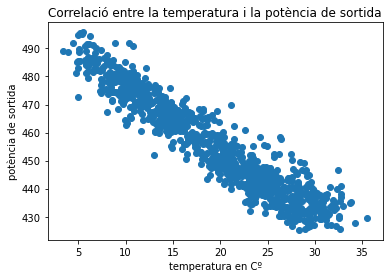

In [16]:
from matplotlib import pyplot as plt
import pandas as pd
from pyspark.sql.functions import rand 

'''
primer farem una query SQL seleccionant les columnes de temperatura atmosfèrica (AT) i 
power output (PE) de la taula power_plant. Ho afegim a sqlContext.sql. A x_y_DF, afegim 
la variable amb la query SQL x_y i el nom de les columnes que volem correlacionar a
la gràfica.
Finalment, fent servir notació que s'utilitza a pandas, afegim a plt.scatter x_y_DF['AT'] i 
x_y_DF['PE'] per veure la gràfica de dispersió. 
Per millorar l'aspecte podem incloure títol i descripció dels eixos x, y amb plt.title(),
plt.xlabel i plt.ylabel).
'''

x_y=sqlContext.sql("SELECT AT, PE FROM power_plant").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns=['AT', 'PE']);

plt.scatter(x_y_DF['AT'], x_y_DF['PE'])
plt.title('Correlació entre la temperatura i la potència de sortida')
plt.xlabel('temperatura en Cº')
plt.ylabel('potència de sortida')
plt.show()

Parece que hay una gran correlación entre temperatura y power output. Esta correlación es esperable gracias a la segunda ley de la termodinamica [thermal efficiency](https://en.wikipedia.org/wiki/Thermal_efficiency). Ir más allá en este análisis queda fuera del ámbito de esta práctica.

### Ejercicio 3(b)

Repitiendo el proceso anterior, usa una sentencia SQL para crear un gráfico de dispersión entre las variables Power (PE) y Exhaust Vacuum Speed (V).

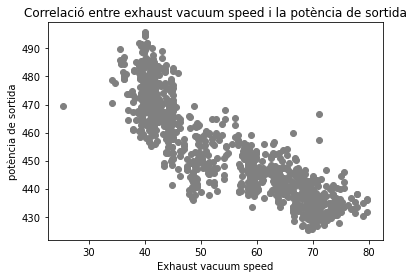

In [17]:
'''
farem exactament igual que amb la gràfica anterior però fent servir exhaust vacuum speed en 
lloc de temperatura. Canviarem la variable AT per V a la query, columns del dataframe i 
plt.scatter. Posem la nova variable al títol i la descripció de l'eix x.
'''

x_y=sqlContext.sql("SELECT V, PE FROM power_plant").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns=['V', 'PE']);

plt.scatter(x_y_DF['V'], x_y_DF['PE'], color='grey')
plt.title('Correlació entre exhaust vacuum speed i la potència de sortida')
plt.xlabel('Exhaust vacuum speed')
plt.ylabel('potència de sortida')
plt.show()

Ahora vamos a repetir este ejercicio con el resto de variables y la etiqueta Power Output.

### Ejercicio 3(c)

Usa una sentencia SQL para crear un gráfico de dispersión entre las variables Power (PE) y Pressure (AP).

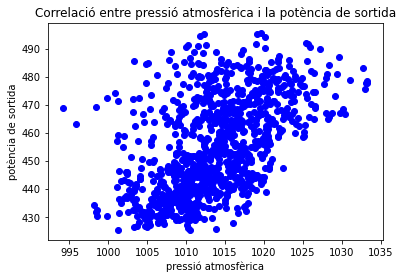

In [18]:
# mateix procés que hem fet anteriorment, però amb la variable pressió atmosfèrica (AP).
x_y=sqlContext.sql("SELECT AP, PE FROM power_plant").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns=['AP', 'PE']);

plt.scatter(x_y_DF['AP'], x_y_DF['PE'], color='blue')
plt.title('Correlació entre pressió atmosfèrica i la potència de sortida')
plt.xlabel('pressió atmosfèrica')
plt.ylabel('potència de sortida')
plt.show()

### Ejercicio 3(d)

Usa una sentencia SQL para crear un gráfico de dispersión entre las variables Power (PE) y Humidity (RH).

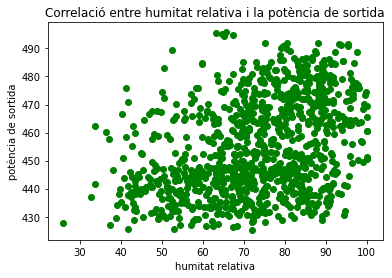

In [19]:
# mateix procés però amb humitat relativa (RH)
x_y=sqlContext.sql("SELECT RH, PE FROM power_plant").limit(1000).collect()
x_y_DF = pd.DataFrame(x_y, columns=['RH', 'PE']);

plt.scatter(x_y_DF['RH'], x_y_DF['PE'], color='green')
plt.title('Correlació entre humitat relativa i la potència de sortida')
plt.xlabel('humitat relativa')
plt.ylabel('potència de sortida')
plt.show()

## Parte 4: Preparación de los datos

El siguiente paso es preparar los datos para aplicar la regresión. Dado que todo el dataset es numérico y consistente, esta será una tarea sencilla y directa.

El objetivo es utilizar el método de regresión para determinar una función que nos dé la potencia de salida como una función de un conjunto de características de predicción. El primer paso en la construcción de nuestra regresión es convertir las características de predicción de nuestro DataFrame a un vector de características utilizando el método [pyspark.ml.feature.VectorAssembler()](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.feature.VectorAssembler).

El VectorAssembler es una transformación que combina una lista dada de columnas en un único vector. Esta transformación es muy útil cuando queremos combinar características en crudo de los datos con otras generadas al aplicar diferentes funciónes sobre los datos en un único vector de características. Para integrar en un único vector toda esta información antes de ejecutar un algoritmo de aprendizaje automático, el VectorAssembler toma una lista con los nombres de las columnas de entrada (lista de strings) y el nombre de la columna de salida (string).

==========================================================================================================================================================================================================
### Ejercicio 4

- Leer la documentación y los ejemplos de uso de [VectorAssembler](https://spark.apache.org/docs/latest/ml-features.html#vectorassembler)
- Convertir la tabla SQL `power_plant` en un `dataset` llamado datasetDF
- Establecer las columnas de entrada del VectorAssember: `["AT", "V", "AP", "RH"]`
- Establecer las columnas de salida como `"features"`

In [20]:
# TODO: Replace <FILL_IN> with the appropriate code
from pyspark.ml.feature import VectorAssembler

#afegim el dataset i les columnes tal com indiquen a l'enunciat
datasetDF = sqlContext.table('power_plant')

vectorizer = VectorAssembler()
vectorizer.setInputCols(["AT", "V", "AP", "RH"])
vectorizer.setOutputCol("features")

VectorAssembler_67f908f12bfc

In [21]:
# TEST
assert set(vectorizer.getInputCols())== {"AT", "V", "AP", "RH"}, "Incorrect vectorizer input columns"
assert vectorizer.getOutputCol()=="features", "Incorrect vectorizer output column"

## Parte 5: Modelar los datos

Ahora vamos a modelar nuestros datos para predecir qué potencia de salida se dará cuando tenemos una serie de lecturas de los sensores

La API de [Apache Spark MLlib](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#module-pyspark.ml) ofrece diferentes implementaciones de técnicas de regresión para modelar datasets. En este ejercicio vamos a modelar nuestros datos para predecir que potencia de salida se dará cuando tenemos una serie de lecturas de los sensores basándonos en una simple regresión líneal ya que vimos algunos patrones líneales en nuestros datos en los gráficos de dispersión durante la etapa de exploración.

Necesitamos una forma de evaluar cómo de bien nuestro modelo de [regresión líneal](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.línearRegression) predice la producción de potencia en función de parámetros de entrada. Podemos hacer esto mediante la división de nuestros datos iniciales establecidos en un _Training set_ utilizado para entrenar a nuestro modelo y un _Test set_ utilizado para evaluar el rendimiento de nuestro modelo. Podemos usar el método nativo de los DataFrames [randomSplit()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.randomSplit) para dividir nuestro dataset. El método toma una lista de pesos y una semilla aleatoria opcional. La semilla se utiliza para inicializar el generador de números aleatorios utilizado por la función de división.

NOTA: Animamos a los alumnos a explorar las diferentes técnicas de regresión disponibles en la [API ML de Spark](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#module-pyspark.ml.classification)

==========================================================================================================================================================================================================
### Ejercicio 5(a)

Utiliza el método [randomSplit()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.randomSplit) para dividir `datasetDF` en trainingSetDF (80% del DataFrame de entrada) y testSetDF (20% del DataFrame de entrada), para poder reproducir siempre el mismo resultado, usar la semilla 1800009193. Finalmente, cachea (cache()) cada datafrane en memoria para maximizar el rendimiento.

In [22]:
 
# We'll hold out 20% of our data for testing and leave 80% for training
seed= 1800009193

(testSetDF, trainingSetDF) = datasetDF.randomSplit([0.2, 0.8] ,seed)

# Let's cache these datasets for performance
testSetDF.cache()
trainingSetDF.cache()

DataFrame[AT: double, V: double, AP: double, RH: double, PE: double]

In [23]:
# TEST
assert trainingSetDF.count()== 38317, "Incorrect size for training data set"
assert testSetDF.count()== 9523, "Incorrect size for test data set"

A continuacion vamos a crear un modelo de regresión líneal y utilizar su ayuda para entender cómo entrenarlo. Ver la API de [línear Regression](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.línearRegression) para mas detalles.

### Ejercicio 5(b)

- Lee la documentacion y los ejemplos de [línear Regression](https://spark.apache.org/docs/latest/ml-classification-regression.html#línear-regression)
- Ejecuta la siguiente celda

In [24]:
# ***** líneaR REGRESSION MODEL ****

from pyspark.ml.regression import línearRegression
from pyspark.ml.regression import línearRegressionModel
from pyspark.ml import Pipeline

# Let's initialize our línear regression learner
lr = línearRegression()

# We use explain params to dump the parameters we can use
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
epsilon: The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber (default: 1.35)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
loss: The loss function to be optimized. Supported options: squaredError, huber. (default: squaredError)
maxBlockSizeInMB: maximum memory in MB for stacking input data into blocks. Data is stacked within partitions. If more than remaining data size in a partition then it is adjusted to the data size. Default 0.0 represents choosing optimal value, depends on specific algorithm. Must be >= 0. (default: 0.0)
maxIter: max number of iterations (>= 0). (default: 100)
predic

La siguiente celda esta basada en [Spark ML Pipeline API for línear Regression](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.línearRegression).

El primer paso es establecer los valores de los parametros siguientes:
- Define el nombre de la columna donde guardaremos la predicción como "Predicted_PE"
- Define el nombre de la columna que contiene la etiqueta como "PE"
- Define el número máximo de iteraciones a 100
- Define el parámetro de regularización a 0.1

Ahora, crearemos el [ML Pipeline](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.Pipeline) (flujo de ejecucion) y estableceremos las fases del pipeline como vectorizar y posteriormente aplicar el regresor líneal que hemos definido.

Finalmente, crearemos el modelo entrenándolo con el DataFrame `trainingSetDF`.

### Ejercicio 5(c)

- Lee la documentacion [línear Regression](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.línearRegression) documentation
- Completa y ejecuta la siguiente celda introduciendo los parámetros descritos para nuestra regresión.

In [25]:
## TODO: Replace <FILL_IN> with the appropriate code
# Now we set the parameters for the method
lr.setPredictionCol("Predicted_PE")\
  .setLabelCol("PE")\
  .setMaxIter(100)\
  .setRegParam(0.1)


# We will use the new spark.ml pipeline API. If you have worked with scikit-learn this will be very familiar.
lrPipeline = Pipeline()

lrPipeline.setStages([vectorizer, lr])

# Let's first train on the entire dataset to see what we get
lrModel = lrPipeline.fit(trainingSetDF)

Del articulo de Wikipedia [línear Regression](https://en.wikipedia.org/wiki/línear_regression) podemos leer:
> In statistics, línear regression is an approach for modeling the relationship between a scalar dependent variable \\( y \\) and one or more explanatory variables (or independent variables) denoted \\(X\\). In línear regression, the relationships are modeled using línear predictor functions whose unknown model parameters are estimated from the data. Such models are called línear models.

Los modelos de regresión líneal tienen muchos usos prácticos. La mayoría de los cuales se clasifican en las siguientes dos categorias:
- Si el objetivo es la predicción o la reducción de errores, la regresión líneal puede utilizarse para adaptar un modelo predictivo a un conjunto de datos observados \\(y\\) y \\(X\\). Despues de desarrollar un modelo de este tipo, dado un cierto valor  \\( X\\) del que no conocemos su valor de \\(y \\), el modelo ajustado puede utilizarse para hacer una prediccion del valor del posible valor \\(y \\).
- Dada una variable \\(y\\) y un número de variables \\( X_1 \\), ..., \\( X_p \\) que pueden estar relacionadas con \\(y\\), un análisis de regresión líneal puede ser aplicado a cuantificar cómo de fuerte es la relación entre \\(y\\) y cada \\( X_j\\), para evaluar que \\( X_j \\) puede no tener ninguna relación con \\(y\\), y de esta forma identificar que subconjuntos de \\( X_j \\) contienen información redundante sobre \\(y\\).

Como estamos interesados en ambos usos, nos gustaría para predecir la potencia de salida en función de las variables de entrada, y nos gustaría saber cuáles de las variables de entrada están débilmente o fuertemente correlacionadas con la potencia de salida.

Ya que una regresión líneal tan solo calcula la línea que minimiza el error cuadrático medio en el dataset de entrenamiento, dadas múltiples dimensiones de entrada podemos expresar cada predictor como una función líneal en la forma:

\\[ y = a + b x_1 + b x_2 + b x_i ... \\]

donde \\(a\\) es el intercept (valor para el punto 0) y las \\(b\\) son los coeficientes.

Para expresar los coeficientes de esa línea podemos recuperar la etapa del Estimador del Modelo del pipeline y de expresar los pesos y el intercept de la función.

### Ejercicio 5(d)

Ejecuta la celda siguiente y asegurate que entiendes lo que sucede.

In [26]:
# The intercept is as follows:
intercept = lrModel.stages[1].intercept

# The coefficents (i.e., weights) are as follows:
weights = lrModel.stages[1].coefficients

# Create a list of the column names (without PE)
featuresNoLabel = [col for col in datasetDF.columns if col != "PE"]

# Merge the weights and labels
coefficents = zip(weights, featuresNoLabel)

equation = "y = {intercept}".format(intercept=intercept)
variables = []
for x in coefficents:
    weight = abs(x[0])
    name = x[1]
    symbol = "+" if (x[0] > 0) else "-"
    equation += (" {} ({} * {})".format(symbol, weight, name))

# Finally here is our equation
print("línear Regression Equation: " + equation)

línear Regression Equation: y = 435.5639193766074 - (1.9173221801525955 * AT) - (0.2548382419437203 * V) + (0.08003570885266557 * AP) - (0.14707064759012597 * RH)


Qué obtenemos como resultado de esta ejecución?

"l'equació que prediu la potència de sortida en funció dels coeficients de temperatura, 'exhaust vacuum speed', pressió atmosfèrica i humitat relativa."

### Ejercicio 5(e)

Ahora estudiaremos como se comportan nuestras predicciones en este modelo. Aplicamos nuestro modelo de regresión líneal para el 20% de los datos que hemos separado del conjunto de datos de entrada. La salida del modelo sera una columna de produccion de electricidad teorica llamada "Predicted_PE".

- Ejecuta la siguiente celda
- Desplazate por la tabla de resultados y observa como los valores de la columna de salida de corriente (PE) se comparan con los valores correspondientes en la salida de potencia predecida  (Predicted_PE)

In [27]:
# Apply our LR model to the test data and predict power output
predictionsAndLabelsDF = lrModel.transform(testSetDF).select("AT", "V", "AP", "RH", "PE", "Predicted_PE")

predictionsAndLabelsDF.show()

+----+-----+-------+-----+------+------------------+
|  AT|    V|     AP|   RH|    PE|      Predicted_PE|
+----+-----+-------+-----+------+------------------+
|1.81|39.42|1026.92|76.97|490.55|492.91808512307705|
|2.34|39.42|1028.47|69.68|490.34|493.09810473724986|
|2.71|39.42|1026.66|81.11| 489.3| 490.5628133956149|
| 3.0|39.64| 1011.0|80.14| 485.2| 488.8400248776727|
|3.21|38.44| 1016.9|86.34|491.35|488.30356577734506|
|3.21|38.44|1017.11|84.86|492.93| 488.5380378346375|
|3.21|38.44|1017.11|84.86|492.93| 488.5380378346375|
|3.31|39.42|1024.05|84.31|487.19| 488.7329008151295|
|3.38|39.64| 1011.0|81.22|488.92|487.95260614981737|
|3.38|41.31| 998.79|97.76|489.11|484.11724176953965|
|3.51|35.47|1017.53|86.56|489.07| 488.5033056559795|
| 3.6|35.19|1018.73| 99.1|488.98|486.65387829735306|
|3.63|38.44|1016.16|87.38|487.87|487.28611056363627|
|3.68|39.64|1011.31|84.05|490.02|486.98601063283587|
|3.69|38.44|1016.74|82.87|490.78| 487.8807805645931|
|3.69|38.44|1016.74|82.87|490.78| 487.88078056

A partir de una inspección visual de las predicciones, podemos ver que están cerca de los valores reales.

Sin embargo, nos gustaría disponer de una medida científica exacta de la bondad del modelo. Para realizar esta medición, podemos utilizar una métrica de evaluación como la [Error cuadrático medio](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSE) para validar nuestro modelo.

RSME se define como: \\( RMSE = \sqrt{\frac{\sum_{i = 1}^{n} (x_i - y_i)^2}{n}}\\) donde \\(y_i\\) es el valor observado \\(x_i\\) es el valor predicho

RMSE es una medida muy habitual para calcular las diferencias entre los valores predichos por un modelo o un estimador y los valores realmente observados. Cuanto menor sea el RMSE, mejor será nuestro modelo.

Spark ML Pipeline proporciona diferentes métricas para evaluar modelos de regresión, incluyendo [RegressionEvaluator()](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.RegressionEvaluator).

Después de crear una instancia de [RegressionEvaluator](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.RegressionEvaluator), fijaremos el nombre de la columna objetivo "PE" y  el nombre de la columna de predicción a "Predicted_PE". A continuación, invocaremos el evaluador en las predicciones.

### Ejercicio 5(f)
Completa y ejecuta la celda siguiente:

In [28]:
# Now let's compute an evaluation metric for our test dataset
from pyspark.ml.evaluation import RegressionEvaluator

# Create an RMSE evaluator using the label and predicted columns
#afegim 'Predicted_PE' a predictionCol, 'PE' a labelCol i 'rmse' a metricName
regEval = RegressionEvaluator(predictionCol= 'Predicted_PE', labelCol='PE', metricName='rmse')

# Run the evaluator on the DataFrame
rmse = regEval.evaluate(predictionsAndLabelsDF)

print("Root Mean Squared Error: %.2f" % rmse)

Root Mean Squared Error: 4.46


Que resultado de RMSE hemos obtenido?
4.46

Otra medida de evaluación estadística muy útil es el coeficiente de determinación, que se denota \\(R ^ 2 \\) o \\(r ^ 2\\) y pronunciado "R cuadrado". Es un número que indica la proporción de la variación en la variable dependiente que es predecible a partir de las variables independientes y proporciona una medida de lo bien que los resultados observados son replicados por el modelo, basado en la proporción de la variación total de los resultados explicada por el modelo. El coeficiente de determinación va de 0 a 1 (más cerca de 1), y cuanto mayor sea el valor, mejor es nuestro modelo.


Para calcular \\(r^2\\), hemos de ejecutar el evaluador `regEval.metricName: "r2"`

Vamos a calcularlo ejecutando la celda siguiente.

In [29]:
# Now let's compute another evaluation metric for our test dataset
r2 = regEval.evaluate(predictionsAndLabelsDF, {regEval.metricName: "r2"})

print("r2: {0:.2f}".format(r2))

r2: 0.93


Que resultado de \\(r^2\\) hemos obtenido? A partir de dicho parametro, crees que el modelo calculado se ajusta bien a los datos?
"Com més a prop d'1, millor és el model. Un \\(r^2\\) de 0.93 ens indica que el model s'ajusta 
bé als valors observats." 


En general, suponiendo una distribución Gaussiana de errores, un buen modelo tendrá 68% de las predicciones dentro de 1 RMSE y 95% dentro de 2 RMSE del valor real (ver http://statweb.stanford.edu/~susan/courses/s60/split/node60.html).

Vamos a examinar las predicciones y ver si un RMSE como el obtenido cumple este criterio.

Crearemos un nuevo DataFrame usando [selectExpr()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.selectExpr) para generar un conjunto de expresiones SQL, y registrar el DataFrame como una tabla de SQL utilizando [registerTempTable()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.registerTempTable).

### Ejercicio 5(g)

Ejecuta la celda siguiente y asegúrate que entiendes lo que sucede.

In [30]:
# First we remove the table if it already exists
#Fem servir el sqlContext.sql() per eliminar la taula que volem crear.
sqlContext.sql('DROP TABLE IF EXISTS Power_Plant_RMSE_Evaluation')

# Next we calculate the residual error and divide it by the RMSE
predictionsAndLabelsDF.selectExpr("PE", "Predicted_PE", "PE - Predicted_PE Residual_Error", "(PE - Predicted_PE) / {} Within_RSME".format(rmse)).registerTempTable("Power_Plant_RMSE_Evaluation")

C:\Users\Joan Salas Dalmau\anaconda3\lib\site-packages\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


Podemos utilizar sentencias SQL para explorar la tabla `Power_Plant_RMSE_Evaluation`. En primer lugar vamos a ver qué datos en la tabla utilizando una sentencia SELECT de SQL.

Completa la siguiente consulta para que devuelva los elementos de la tabla `Power_Plant_RMSE_Evaluation` y muestra algunos por pantalla con la acción show().

In [31]:
'''
Fem servir la query SELECT * FROM ... per veure les columnes de la taula creada,
seguit de .show()
'''
sqlContext.sql('SELECT * FROM Power_Plant_RMSE_Evaluation').show()

+------+------------------+-------------------+--------------------+
|    PE|      Predicted_PE|     Residual_Error|         Within_RSME|
+------+------------------+-------------------+--------------------+
|490.55|492.91808512307705|-2.3680851230770372| -0.5305953545643743|
|490.34|493.09810473724986|  -2.75810473724988| -0.6179835119631268|
| 489.3| 490.5628133956149|-1.2628133956148986|-0.28294714360786566|
| 485.2| 488.8400248776727|-3.6400248776727153| -0.8155873586513247|
|491.35|488.30356577734506|  3.046434222654966|  0.6825868845568823|
|492.93| 488.5380378346375|  4.391962165362486|  0.9840671264957801|
|492.93| 488.5380378346375|  4.391962165362486|  0.9840671264957801|
|487.19| 488.7329008151295|-1.5429008151294852| -0.3457037912545762|
|488.92|487.95260614981737| 0.9673938501826456|   0.216755165571959|
|489.11|484.11724176953965| 4.9927582304603675|  1.1186820514724956|
|489.07| 488.5033056559795| 0.5666943440205046| 0.12697406164373062|
|488.98|486.65387829735306|  2.326

### Ejercicio 5(h)

Mostrad el RMSE como un histograma.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

Puedes jugar con los diferentes parámetros del histograma como el numero de 'bins' o el parámetro densidad, que cambia entre el 'contaje' de elementos en cada bin o la normalización para que el area del histograma sea 1.
De forma similar al ejercicio 3, toma una muestra aleatoria de 2000 elementos y haz un collect para hacer el plot.

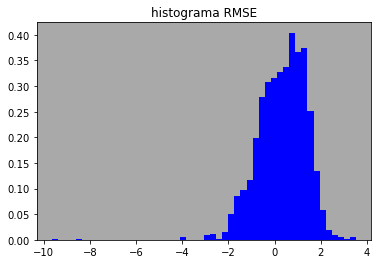

In [32]:
import numpy as np
'''
fem la query SELECT Within_RSME FROM ... per agafar les dades que volem visualitzar
a l'histograma. afegim la variable df_x pd.Dataframe(..).tonumpy(), posem 50 bins i
afegim density True.
'''
df_x=sqlContext.sql("SELECT Within_RSME FROM Power_Plant_RMSE_Evaluation").limit(2000).collect()

#MATPLOTLIB 
#LO PODÉIS MODIFICAR PARA QUE PODÁIS MOSTRAR LA DISTRIBUCIÓN EN HISTOGRAMA DE RSME
#ESTO ES SOLO UNA BASE, PERO HAY MANERAS DIFERENTES

x = pd.DataFrame(df_x).to_numpy()

num_bins= 50

plt.hist(x, num_bins, density = True, color = 'blue')
plt.gca().set_facecolor('darkgrey')
plt.title('histograma RMSE')
plt.show()

Observa que el histograma deberia mostrar claramente que el RMSE se centra alrededor de 0 con la gran mayoría de errores dentro de 2 RMSE.

Usando una instrucción SELECT de SQL un poco más compleja, podemos contar el número de predicciones dentro de + o - 1,0 y + o - 2,0.

Cuantas predicciones estan dentro de cada uno de los intervalos (+-1 RSME, +-2RSME y más allá)? Completad la parte de código que falta para poder averiguarlo.

In [33]:
'''
la query ja dóna el nombre de prediccions dins de +-1 RMSE, +-2 RMSE i
més enllà, només afegirem un order by per veure-ho ordenat per RMSE_Multiple.
'''
df_y=sqlContext.sql("SELECT case when Within_RSME <= 1.0 AND Within_RSME >= -1.0 then 1 when  Within_RSME <= 2.0 AND Within_RSME >= -2.0 then 2 else 3 end RSME_Multiple, COUNT(*) AS count FROM Power_Plant_RMSE_Evaluation GROUP BY case when Within_RSME <= 1.0 AND Within_RSME >= -1.0 then 1  when  Within_RSME <= 2.0 AND Within_RSME >= -2.0 then 2 else 3 end ORDER BY RSME_Multiple")

# Visionamos el resultado de la instrucción.
df_y.show()

+-------------+-----+
|RSME_Multiple|count|
+-------------+-----+
|            1| 6428|
|            2| 2792|
|            3|  303|
+-------------+-----+



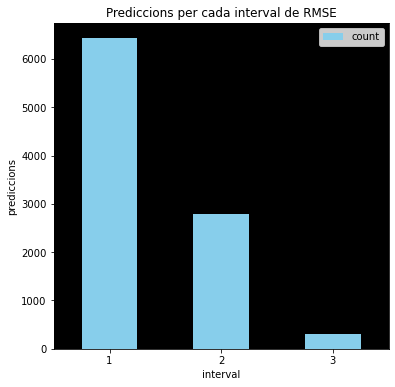

In [34]:
'''
podem afegir una gràfica de barres per veure més clar a on es troben la majoria de prediccions 
i així poder determinar visualment si tenim un model ajustat o no.
'''
df_y_pd = df_y.toPandas()
df_y_pd.plot.bar(x='RSME_Multiple', y='count', figsize=(6, 6), color='skyblue', width=0.5)
plt.gca().set_facecolor('black')
plt.title('Prediccions per cada interval de RMSE')
plt.xlabel('interval')
plt.ylabel('prediccions')
plt.xticks(rotation=0)
plt.show()

- ¿Cuantas predicciones estan a 1 RMSE como máximo de los valores reales? 6428
- ¿Y cuantas predicciones estan a 2 RMSE como máximo de los valores reales? 2792

## Responde las siguientes preguntas
- ¿A partir de los resultados del ejercicio 5, te parece que el modelo ajusta bien los datos?

Tenint en compte que la major part de les prediccions están a 1 o 2 RMSE dels valors reals, està complint el criteri (68% a 1 RMSE i 95% a 2 RMSE) del que es considera un bon model que s'ajusta als valors observats.

- ¿Qué otras técnicas de regresión usaríais a partir del análisis de datos del apartado 3?

Hi ha moltes altres tècniques que es podrien fer servir a partir de l'anàlisi de dades de la secció 3. Si consultem la documentació podem trobar màquines de factorització (factorization machines), per estimar les interaccions entre característiques en problemes amb una gran dispersió (gràfica de correlació entre humitat relativa i potència de sortida per example), arbres de decisió (decision trees), utilitzats tant per tasques de classificació o regressió amb variables categòriques o continues, fàcils d'interpretar. Boscos aleatoris (random forests), seria un conjunt d'arbres de decisió per millorar la precisió, arbres amb gradient (Gradient Boosted Trees o GBTs), un altre conjunt d'arbres de decisió però per millorar el rendiment.
Altres mètodes o tècniques serien regressió líneal generalitzada, regressió isotònica (isotonic regression) o regressió de supervivència (survival regression)

- ¿Estan todas disponibles en Spark?

Les indicades es troben disponibles a Spark, però també hi ha altres llibreries disponibles.

- ¿Y si no es el caso, qué otros librerias y herramientas de Machine Learning podriamos usar?

Es poden utilitzar llibreries populars com Scikit-learn, TensorFlow, Keras, XGBoost.
L'elecció dependrà del tipus de dades i les relacions observades entre les variables independents
i dependents.

NOTA: Puedes responder generando nuevas celdas de texto. Indica claramente que se trata de la respuesta a cada una de las preguntas.